# 1 - DEFINE THE PROBLEM

#We are exploring the contents of the imagenet_class_names.txt file,
#which contains class labels used in ImageNet-based deep learning models.
#This notebook will help understand the label structure and prepare it 
#for use in machine learning pipelines.


# 2 - IMPORT REQUIRED LIBRARIES

In [2]:
# Data manipulation and analysis
import pandas as pd      
import numpy as np        

# Data visualization
import matplotlib.pyplot as plt   
import seaborn as sns            



In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# 3. LOAD

In [30]:
import pandas as pd
import os

# Definir ruta relativa
path = "../datasets/"
dataset = "imagenet_class_names.txt"
file_path = os.path.join(path, dataset)

# Cargar el archivo línea por línea
with open(file_path, "r") as file:
    class_names = [line.strip() for line in file.readlines() if line.strip()]

# Convertir la lista en un DataFrame
df_classes = pd.DataFrame(class_names, columns=["Class"])

# Mostrar las primeras filas organizadas
print(df_classes.head(10))




                                               Class
0                       n01440764 tench, Tinca tinca
1              n01443537 goldfish, Carassius auratus
2  n01484850 great white shark, white shark, man-...
3          n01491361 tiger shark, Galeocerdo cuvieri
4             n01494475 hammerhead, hammerhead shark
5  n01496331 electric ray, crampfish, numbfish, t...
6                                 n01498041 stingray
7                                     n01514668 cock
8                                      n01514859 hen
9                n01518878 ostrich, Struthio camelus


# 4 - EDA (Exploratory Data Analysis) of the DATA

### 4.1.0

In [8]:
# Convertir la lista de clases en un DataFrame
df = pd.DataFrame(class_names, columns=["class_name"])

# Agregar una columna con la longitud de cada nombre de clase
df["length"] = df["class_name"].apply(len)

# Agregar una columna con la primera letra de cada nombre de clase
df["first_letter"] = df["class_name"].apply(lambda x: x[0])

# Mostrar estadísticas descriptivas
print(df.describe(include="all"))


                                               class_name       length first_letter
count                                                1000  1000.000000         1000
unique                                               1000          NaN            1
top     n15075141 toilet tissue, toilet paper, bathroo...          NaN            n
freq                                                    1          NaN         1000
mean                                                  NaN    30.675000          NaN
std                                                   NaN    16.886638          NaN
min                                                   NaN    12.000000          NaN
25%                                                   NaN    18.000000          NaN
50%                                                   NaN    26.000000          NaN
75%                                                   NaN    37.000000          NaN
max                                                   NaN   131.000000      

# 5. Visualize the Data

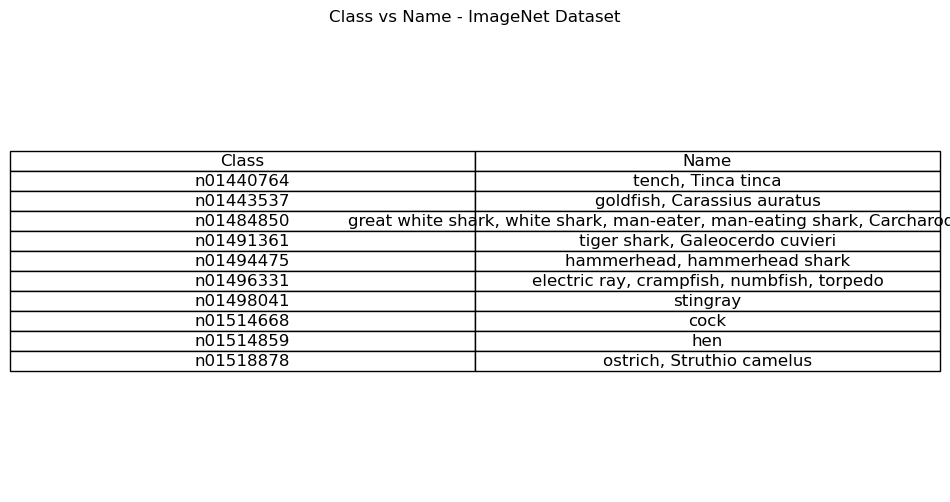

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la lista en un DataFrame
df = pd.DataFrame(class_names, columns=["full_text"])

# Dividir la columna en 'class' y 'name'
df[['class', 'name']] = df['full_text'].str.split(' ', n=1, expand=True)

# Eliminar la columna original 'full_text'
df.drop(columns=["full_text"], inplace=True)

# Crear gráfico tipo tabla con dos columnas
fig, ax = plt.subplots(figsize=(10, 6))

# Ocultar el eje
ax.axis("tight")
ax.axis("off")

# Construir la tabla con los datos
table_data = list(zip(df["class"], df["name"]))
table = ax.table(cellText=table_data[:10], colLabels=["Class", "Name"], cellLoc="center", loc="center")

# Ajustar estilo
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Mostrar el gráfico-tabla
plt.title("Class vs Name - ImageNet Dataset")
plt.show()







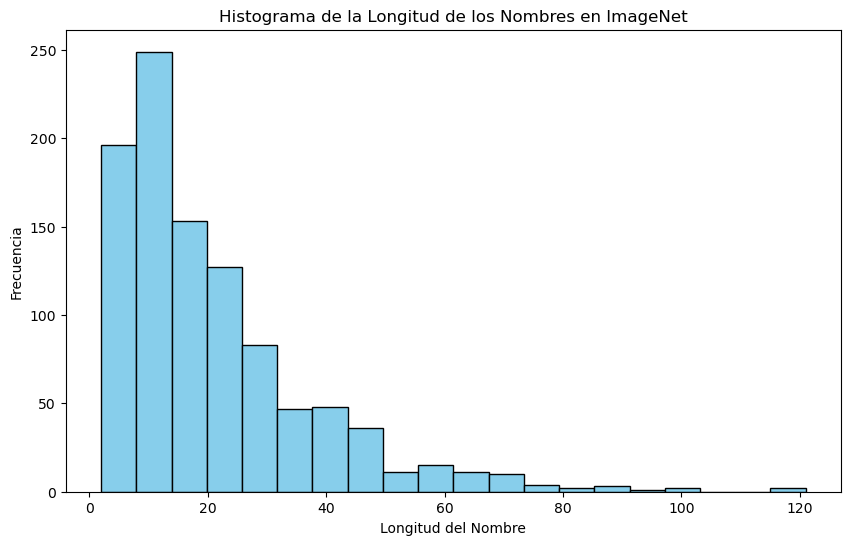

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la lista en un DataFrame
df = pd.DataFrame(class_names, columns=["full_text"])

# Dividir la columna en 'class' y 'name'
df[['class', 'name']] = df['full_text'].str.split(' ', n=1, expand=True)

# Calcular la longitud de cada nombre
df["name_length"] = df["name"].apply(len)

# Crear histograma de la longitud de los nombres de clase
plt.figure(figsize=(10, 6))
plt.hist(df["name_length"], bins=20, color="skyblue", edgecolor="black")

# Etiquetas y título
plt.xlabel("Longitud del Nombre")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Longitud de los Nombres en ImageNet")
plt.show()





In [32]:
import pandas as pd
import os
import re

# Definir ruta relativa
path = "../datasets/"
dataset = "imagenet_class_names.txt"
file_path = os.path.join(path, dataset)

# Cargar el archivo línea por línea
with open(file_path, "r") as file:
    class_names = [line.strip() for line in file.readlines() if line.strip()]

# Convertir la lista en un DataFrame
df = pd.DataFrame(class_names, columns=["full_text"])

# Dividir la columna en 'class' y 'name'
df[['class', 'name']] = df['full_text'].str.split(' ', n=1, expand=True)

# Eliminar la columna original 'full_text'
df.drop(columns=["full_text"], inplace=True)

# Limpiar la columna 'name'
df['name_clean'] = df['name'].str.lower()  # Convertir a minúsculas
df['name_clean'] = df['name_clean'].str.replace(r'[-_]', ' ', regex=True)  # Reemplazar guiones
df['name_clean'] = df['name_clean'].str.replace(r'[^a-z\s]', '', regex=True)  # Eliminar caracteres extraños

# Calcular la longitud de los nombres
df["length"] = df["name_clean"].apply(len)

# Extraer la primera letra del nombre
df["first_letter"] = df["name_clean"].str[0]

# Mostrar las primeras filas organizadas como la imagen
print(df[['class', 'length', 'first_letter', 'name_clean']].head(10))



       class  length first_letter                                         name_clean
0  n01440764      17            t                                  tench tinca tinca
1  n01443537      26            g                         goldfish carassius auratus
2  n01484850      79            g  great white shark white shark man eater man ea...
3  n01491361      30            t                     tiger shark galeocerdo cuvieri
4  n01494475      27            h                        hammerhead hammerhead shark
5  n01496331      39            e            electric ray crampfish numbfish torpedo
6  n01498041       8            s                                           stingray
7  n01514668       4            c                                               cock
8  n01514859       3            h                                                hen
9  n01518878      24            o                           ostrich struthio camelus


## SPLIT THE DATA

In [34]:
import pandas as pd
import os
import re
from sklearn.model_selection import train_test_split

# Definir ruta relativa
path = "../datasets/"
dataset = "imagenet_class_names.txt"
file_path = os.path.join(path, dataset)

# Cargar el archivo línea por línea
with open(file_path, "r") as file:
    class_names = [line.strip() for line in file.readlines() if line.strip()]

# Convertir la lista en un DataFrame
df = pd.DataFrame(class_names, columns=["full_text"])

# Dividir la columna en 'class' y 'name'
df[['class', 'name']] = df['full_text'].str.split(' ', n=1, expand=True)

# Eliminar la columna original 'full_text'
df.drop(columns=["full_text"], inplace=True)

# Limpiar la columna 'name'
df['name_clean'] = df['name'].str.lower()
df['name_clean'] = df['name_clean'].str.replace(r'[-_]', ' ', regex=True)
df['name_clean'] = df['name_clean'].str.replace(r'[^a-z\s]', '', regex=True)

# Dividir los datos en entrenamiento y prueba
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Imprimir la cantidad de clases en cada conjunto
print(f"Train classes: {len(train_df)}")
print(f"Test classes: {len(test_df)}")

# Previsualizar las primeras 5 clases de entrenamiento
print(train_df[['class', 'name_clean']].head(5))



Train classes: 800
Test classes: 200
         class                             name_clean
29   n01632777  axolotl mud puppy ambystoma mexicanum
535  n03208938                  disk brake disc brake
695  n03874599                                padlock
557  n03355925                     flagpole flagstaff
836  n04355933                               sunglass
